In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
data = pd.read_csv(r"C:\Users\Surface\Desktop\大四下\複雜系統\Coding\Final report\WHO-COVID-19-global-data.csv")

In [3]:
set_Country = set(data["Country"])
list_Country = list(set_Country)
list_data = data.values.tolist() #整個轉為list
print(list_Country)

['Bangladesh', 'Bhutan', 'French Guiana', 'USA', 'Palau', 'Niger', 'Nepal', 'Grenada', 'Iran (Islamic Republic of)', 'Saint Vincent and the Grenadines', 'China', 'Liechtenstein', 'Sint Maarten', 'Holy See', 'Madagascar', 'Honduras', 'Mauritania', 'Kazakhstan', 'Paraguay', 'Malaysia', 'Burkina Faso', 'Tokelau', "Lao People's Democratic Republic", 'Zimbabwe', 'Curaçao', 'Papua New Guinea', 'Portugal', 'South Africa', 'Croatia', 'Lithuania', 'Uruguay', 'Tajikistan', 'Bahrain', 'Dominican Republic', 'Lesotho', 'New Caledonia', 'Gabon', 'Algeria', 'Central African Republic', 'Argentina', 'Faroe Islands', 'Cook Islands', 'Liberia', 'Marshall Islands', "Democratic People's Republic of Korea", 'Latvia', 'Samoa', 'Japan', 'Italy', 'Chad', 'Slovenia', 'Vanuatu', 'Myanmar', 'Bahamas', 'Mali', 'American Samoa', 'Gambia', 'India', 'Guernsey', 'Saint Kitts and Nevis', 'Montenegro', 'San Marino', 'Eritrea', 'Saint Lucia', 'Cuba', 'Uzbekistan', 'Egypt', 'Cyprus', 'Monaco', 'Haiti', 'Gibraltar', 'Pakis

In [4]:
for i in list_Country:
    locals()[str(i) + "_data"] = []
    for j in range(0, len(list_data)):
        if(list_data[j][1] == i):
            locals()[str(i) + "_data"].append([[list_data[j][0]], list_data[j][2:6]])
        
        else:
            pass

In [5]:
print(locals()[str("Afghanistan") + "_data"])
print(locals()[str("Afghanistan") + "_data"][0])
print(locals()[str("Afghanistan") + "_data"][0][0])
print(locals()[str("Afghanistan") + "_data"][0][1])

[[['2020/1/3'], [0, 0, 0, 0]], [['2020/1/4'], [0, 0, 0, 0]], [['2020/1/5'], [0, 0, 0, 0]], [['2020/1/6'], [0, 0, 0, 0]], [['2020/1/7'], [0, 0, 0, 0]], [['2020/1/8'], [0, 0, 0, 0]], [['2020/1/9'], [0, 0, 0, 0]], [['2020/1/10'], [0, 0, 0, 0]], [['2020/1/11'], [0, 0, 0, 0]], [['2020/1/12'], [0, 0, 0, 0]], [['2020/1/13'], [0, 0, 0, 0]], [['2020/1/14'], [0, 0, 0, 0]], [['2020/1/15'], [0, 0, 0, 0]], [['2020/1/16'], [0, 0, 0, 0]], [['2020/1/17'], [0, 0, 0, 0]], [['2020/1/18'], [0, 0, 0, 0]], [['2020/1/19'], [0, 0, 0, 0]], [['2020/1/20'], [0, 0, 0, 0]], [['2020/1/21'], [0, 0, 0, 0]], [['2020/1/22'], [0, 0, 0, 0]], [['2020/1/23'], [0, 0, 0, 0]], [['2020/1/24'], [0, 0, 0, 0]], [['2020/1/25'], [0, 0, 0, 0]], [['2020/1/26'], [0, 0, 0, 0]], [['2020/1/27'], [0, 0, 0, 0]], [['2020/1/28'], [0, 0, 0, 0]], [['2020/1/29'], [0, 0, 0, 0]], [['2020/1/30'], [0, 0, 0, 0]], [['2020/1/31'], [0, 0, 0, 0]], [['2020/2/1'], [0, 0, 0, 0]], [['2020/2/2'], [0, 0, 0, 0]], [['2020/2/3'], [0, 0, 0, 0]], [['2020/2/4'], [0

In [65]:
for j in list_Country:

    locals()[str("{}".format(j)) + "_time"] = []
    locals()[str("{}".format(j)) + "_New_cases"] = []
    locals()[str("{}".format(j)) + "_Cumulative_cases"] = []
    locals()[str("{}".format(j)) + "_New_deaths"] = []
    locals()[str("{}".format(j)) + "_Cumulative_deaths"] = []

    for i in range( 0, len(locals()[str("{}".format(j)) + "_data"]) ):
        locals()[str("{}".format(j)) + "_time"].append(locals()[str("{}".format(j)) + "_data"][i][0][0])
        locals()[str("{}".format(j)) + "_New_cases"].append(locals()[str("{}".format(j)) + "_data"][i][1][0])
        locals()[str("{}".format(j)) + "_Cumulative_cases"].append(locals()[str("{}".format(j)) + "_data"][i][1][1])
        locals()[str("{}".format(j)) + "_New_deaths"].append(locals()[str("{}".format(j)) + "_data"][i][1][2])
        locals()[str("{}".format(j)) + "_Cumulative_deaths"].append(locals()[str("{}".format(j)) + "_data"][i][1][3])

### 全球的新增人口

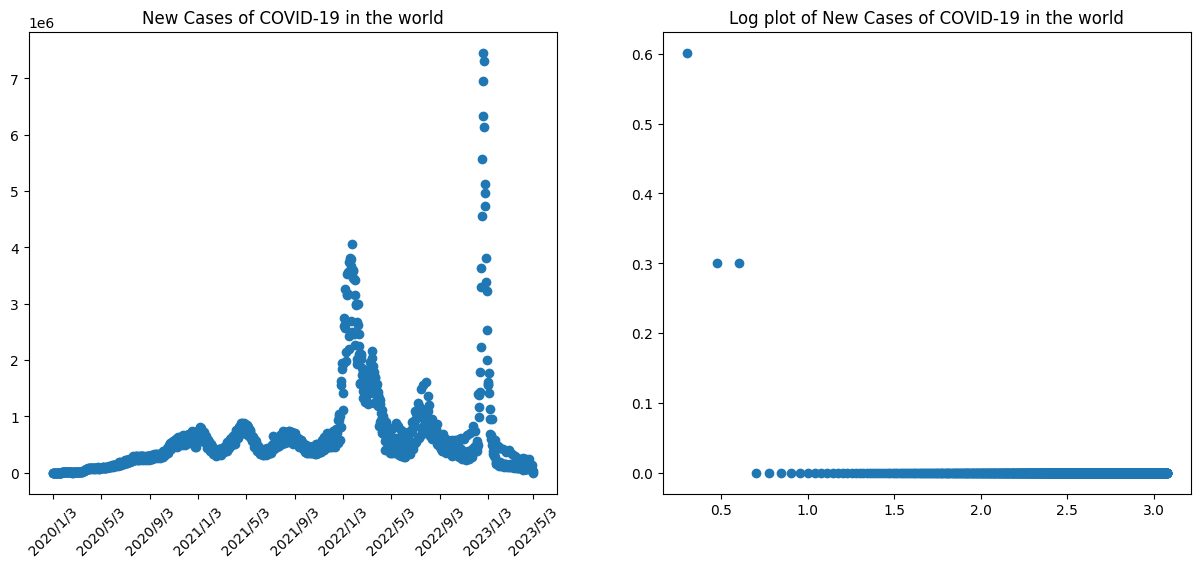

In [77]:
total_cases = []
for i in range(0, len(locals()[str("Afghanistan") + "_data"])):
    
    sum = 0
    for j in list_Country:
        sum = sum + locals()[str("{}".format(j)) + "_New_cases"][i]
    
    total_cases.append(sum)

time = locals()[str("{}".format("{}".format("Afghanistan"))) + "_time"]

count = pd.value_counts(total_cases)
count = list(count)
x = np.linspace(1, len(count), len(count))

log_count = []
log_x = []
for j in range(len(count)):
    log_count.append(np.log10(count[j]))
    log_x.append(np.log10(x[j]))

log_count.remove(log_count[0])
log_x.remove(log_x[0])

rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3", "2023/5/3"]

plt.figure(figsize = (15, 6))
plt.subplot(121)
plt.title("New Cases of COVID-19 in the world")
plt.scatter(time, total_cases)
plt.xticks(rang, rotation = 45)

plt.subplot(122)
plt.title("Log plot of New Cases of COVID-19 in the world")
plt.scatter(log_x, log_count)
plt.show()

### 單獨國家時間的新增人口

In [ ]:
group1 = ["Afghanistan", "Zimbabwe", "China", "Luxembourg", "Cambodia", "Venezuela"]

for i in group1:
    civ = i
    time = locals()[str("{}".format("{}".format(civ))) + "_time"]
    New_cases = locals()[str("{}".format("{}".format(civ))) + "_New_cases"]
    Cumulative_cases = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_cases"]
    New_deaths = locals()[str("{}".format("{}".format(civ))) + "_New_deaths"]
    Cumulative_deaths = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_deaths"]



    count = pd.value_counts(New_cases)
    count = list(count)
    x = np.linspace(1, len(count), len(count))

    log_count = []
    log_x = []
    for j in range(len(count)):
        log_count.append(np.log10(count[j]))
        log_x.append(np.log10(x[j]))

    log_count.remove(log_count[0])
    log_x.remove(log_x[0])

    rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3", "2023/5/3"]
    plt.figure(figsize = (25, 6))
    plt.subplot(131)
    plt.title("New Cases of COVID-19 in {}".format(civ))
    plt.scatter(time, New_cases)
    plt.xticks(rang, rotation = 45)
    plt.subplot(132)
    plt.title("New Deaths of COVID-19 in {}".format(civ))
    plt.scatter(time, New_deaths)
    plt.xticks(rang, rotation = 45)
    plt.subplot(133)
    plt.title("Log plot of New Cases of COVID-19 in {}".format(civ))
    plt.scatter(log_x, log_count)

plt.show()

In [ ]:
group2 = ["Germany", "The United Kingdom", "Ukraine", "USA"]

for i in group2:
    civ = i
    time = locals()[str("{}".format("{}".format(civ))) + "_time"]
    New_cases = locals()[str("{}".format("{}".format(civ))) + "_New_cases"]
    Cumulative_cases = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_cases"]
    New_deaths = locals()[str("{}".format("{}".format(civ))) + "_New_deaths"]
    Cumulative_deaths = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_deaths"]



    count = pd.value_counts(New_cases)
    count = list(count)
    x = np.linspace(1, len(count), len(count))

    log_count = []
    log_x = []
    for j in range(len(count)):
        log_count.append(np.log10(count[j]))
        log_x.append(np.log10(x[j]))

    log_count.remove(log_count[0])
    log_x.remove(log_x[0])

    rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3", "2023/5/3"]
    plt.figure(figsize = (25, 6))
    plt.subplot(131)
    plt.title("New Cases of COVID-19 in {}".format(civ))
    plt.scatter(time, New_cases)
    plt.xticks(rang, rotation = 45)
    plt.subplot(132)
    plt.title("New Deaths of COVID-19 in {}".format(civ))
    plt.scatter(time, New_deaths)
    plt.xticks(rang, rotation = 45)
    plt.subplot(133)
    plt.title("Log plot of New Cases of COVID-19 in {}".format(civ))
    plt.scatter(log_x, log_count)

plt.show()